# 다항선형회귀분석

### 다항 선형 회귀 분석의 정의

다항 선형 회귀 분석(Polynomial Linear Regression Analysis)은 독립 변수(x)와 종속 변수(y) 사이의 관계를 설명하기 위해 사용되는 회귀 분석 기법 중 하나입니다.

일반적인 선형 회귀 분석에서는 독립 변수 x와 종속 변수 y 사이의 선형 관계를 가정합니다. 그러나 때로는 독립 변수와 종속 변수 사이의 관계가 선형이 아니라 곡선 형태로 나타나는 경우가 있습니다. 이런 경우에 다항 선형 회귀 분석을 사용하면 됩니다.

다항 선형 회귀 분석은 일반적인 선형 회귀 분석과 유사하지만, 독립 변수 x가 2차, 3차, 4차 등의 다항식으로 표현되는 경우에 적용됩니다. 이 경우 회귀식은 y = b0 + b1x + b2x^2 + b3x^3 + ... + bnx^n 과 같이 표현됩니다.

이러한 다항식을 사용하여 모델을 구축하면, 더 복잡한 데이터 패턴을 잘 설명할 수 있습니다. 그러나 모델이 더 복잡해지면 과적합(overfitting)의 위험이 있으므로 적절한 차수를 선택하는 것이 중요합니다.

따라서, 다항 선형 회귀 분석은 데이터가 비선형적인 관계를 가질 때, 즉 일반적인 선형 회귀 분석으로는 설명하기 어려운 경우에 유용한 분석 기법입니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

In [2]:
warnings.filterwarnings(action = 'ignore')

In [3]:
df = pd.read_csv('/kaggle/input/fish-market/Fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


### 2차원 그래프를 통해 직관적으로 이해하기 위해 변수를 하나만 선택하여 보겠습니다.

In [4]:
df = df[['Weight','Width']]
df

,Weight,Width
0,242.0,4.0200
1,290.0,4.3056
2,340.0,4.6961
3,363.0,4.4555
4,430.0,5.1340
...,...,...
154,12.2,1.3936
155,13.4,1.2690
156,12.2,1.2558
157,19.7,2.0672


Text(0.5, 1.0, 'Scatterplot of Length, Weight')

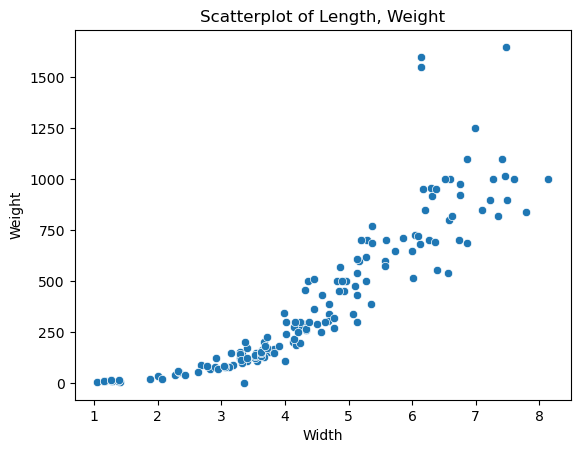

In [5]:
sns.scatterplot(data = df ,
                x = 'Width',
                y = 'Weight')
plt.title('Scatterplot of Length, Weight')

### 독립변수인 Width 와 종속변수인 Weight 의 관계를 선형적이라고 봐도 될까요 ? 
### 어쩌면 직선보다 곡선이 더 어울릴 것 같지는 않나요 ?
### 선형 회귀 분석과 다항 선형 회귀 분석을 그려보며, 보도록 하겠습니다.

# 데이터 모델링 

In [6]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [7]:
x_train,y_train, x_test,y_test = train_test_split(df['Width'], df['Weight'], random_state = 42, test_size = 0.3)

x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)

# 선형 회귀 분석과 다항 선형 회귀 분석 비교 

다항 선형 회귀 분석에서 항의 차수가 올라갈수록 다음과 같은 장단점이 있습니다.

### 장점

* 모델이 더 복잡한 데이터 패턴을 잘 설명할 수 있습니다.
* 비선형적인 관계를 더 정확하게 모델링할 수 있습니다.
* 더 다양한 종류의 함수 형태를 모델링할 수 있습니다.

### 단점:

* 과적합(overfitting)의 위험이 증가합니다. 과적합은 모델이 학습 데이터에만 과도하게 적합되어 실제 데이터에 대한 예측력이 떨어지는 문제를 말합니다.
* 모델의 복잡도가 증가하면 모델의 해석력이 떨어지고, 이에 따라 모델이 해결하려는 문제를 이해하기 어려워집니다.
* 차수가 높아질수록 계산량이 증가하고, 모델의 훈련 시간이 더 많이 소요됩니다.

### 따라서, 다항 선형 회귀 분석에서는 적절한 차수를 선택하는 것이 중요합니다. 이를 위해서는 모델의 복잡도와 성능 사이에 적절한 균형을 유지하며, 일반화 성능을 고려한 교차 검증(Cross-validation) 등의 방법을 사용하여 모델을 평가하고 선택해야 합니다.

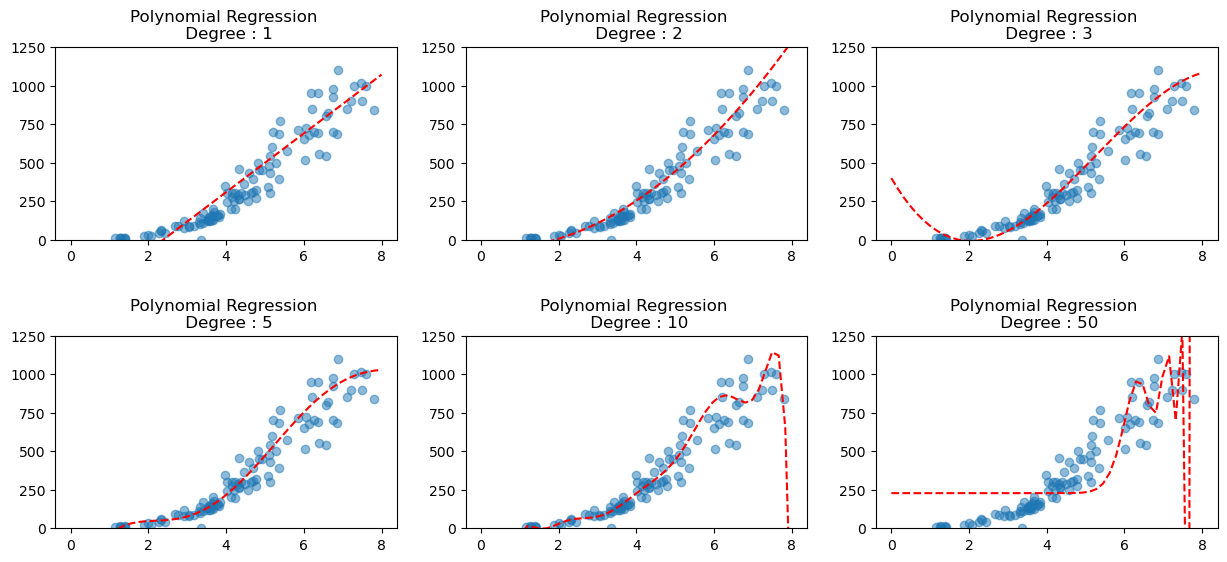

In [8]:
X = np.linspace(0,8,48)

plt.figure(figsize = [15,10])

plt.subplots_adjust(hspace = 0.5)

degree = [1,2,3,5,10,50]

j = 1

model = LinearRegression()

for num in degree:
    
    
    poly = PolynomialFeatures(degree= num, include_bias = False)

    poly_x_train = poly.fit_transform(x_train)
    poly_y_train = poly.fit_transform(y_train)

    poly_model = model.fit(poly_x_train,x_test)
    
    poly_list = []
    
    for i,var in enumerate(poly_model.coef_):
    
        poly_list.append(np.power(X,i+1) * var)
        
    poly_list = sum(poly_list) + model.intercept_
    
    plt.subplot(3,3,j)
    
    plt.scatter(x_train,x_test, alpha = 0.5)
    plt.plot(X,poly_list,'r--',label = f'degree : {num}')
    plt.title(f'Polynomial Regression \n Degree : {num}')
    plt.ylim([0,1250])
    
    j += 1

### 선형 회귀분석의 차수가 증가 할 수록 훈련세트의 변화에 대해 민감하게 fitting 되고 있는 모습을 볼 수 있습니다.

### Test set에 대한 모형 적합도는 어떨까요 ? 

In [9]:
R2_score_list = []
RMSE_list = []

for num in degree:
    
    
    poly = PolynomialFeatures(degree= num, include_bias = False)

    poly_x_train = poly.fit_transform(x_train)
    poly_y_train = poly.fit_transform(y_train)

    poly_model = model.fit(poly_x_train,x_test)
    
    predicted = poly_model.predict(poly_y_train)
    
    r2 = r2_score(y_test,predicted)
    rmse = np.sqrt(mean_squared_error(y_test,predicted))
    
    R2_score_list.append(r2)
    RMSE_list.append(rmse)

In [10]:
result = pd.DataFrame({'Degree': ['1','2','3','5','10','50'],
              'R2 score': R2_score_list,
              'RMSE': RMSE_list})

result

,Degree,R2 score,RMSE
0,1,8.411884e-01,1.394756e+02
1,2,8.905313e-01,1.157983e+02
2,3,9.303728e-01,9.235209e+01
3,5,9.378560e-01,8.724822e+01
4,10,-2.553422e+00,6.597517e+02
5,50,-4.344369e+07,2.306856e+06


(0.0, 1000.0)

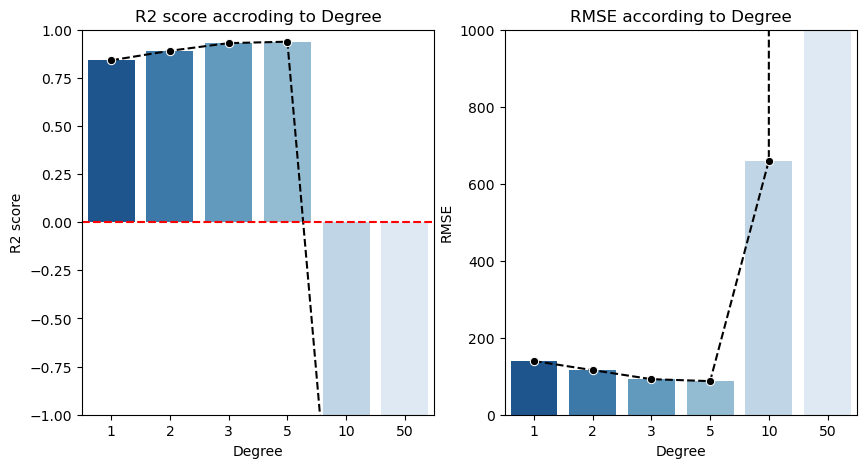

In [11]:
plt.figure(figsize = [10,5])

plt.subplot(1,2,1)

sns.lineplot(data = result,
            x = 'Degree',
            y = 'R2 score',
            marker = 'o',
            ls = '--',
            c = 'black')

sns.barplot(data = result,
            x = 'Degree',
            y = 'R2 score',
            palette = 'Blues_r')

plt.axhline(y = 0, ls = '--', c = 'r')

plt.ylim([-1,1])
plt.title('R2 score accroding to Degree')

plt.subplot(1,2,2)

sns.lineplot(data = result,
            x = 'Degree',
            y = 'RMSE',
            marker = 'o',
            ls = '--',
            c = 'black')

sns.barplot(data = result,
            x = 'Degree',
            y = 'RMSE',
            palette = 'Blues_r')
plt.title('RMSE according to Degree')
plt.ylim([0,1000])

* 차수가 10개인 다항 회귀분석은 설명력이 음수 값입니다.
* 이는 회귀모형이 실제 데이터를 평균값으로 예측했을 때 보다 설명력이 낮음을 의미합니다. 
* 적정 차수로 보이는 5차항 까지는 R2 score값이 최대값이 되고, RMSE 값은 최소값이 되어 갑니다.
* 하지만 이후 10차항, 50차항 다항 회귀 분석이 됐을 때는 훈련세트에 과적합이 되어, 회귀모형의 설명력이 매우 떨어지는 모습을 볼 수 있습니다.

# 그럼 오버피팅을 방지하기 위해 규제를 줘볼까요 ? 

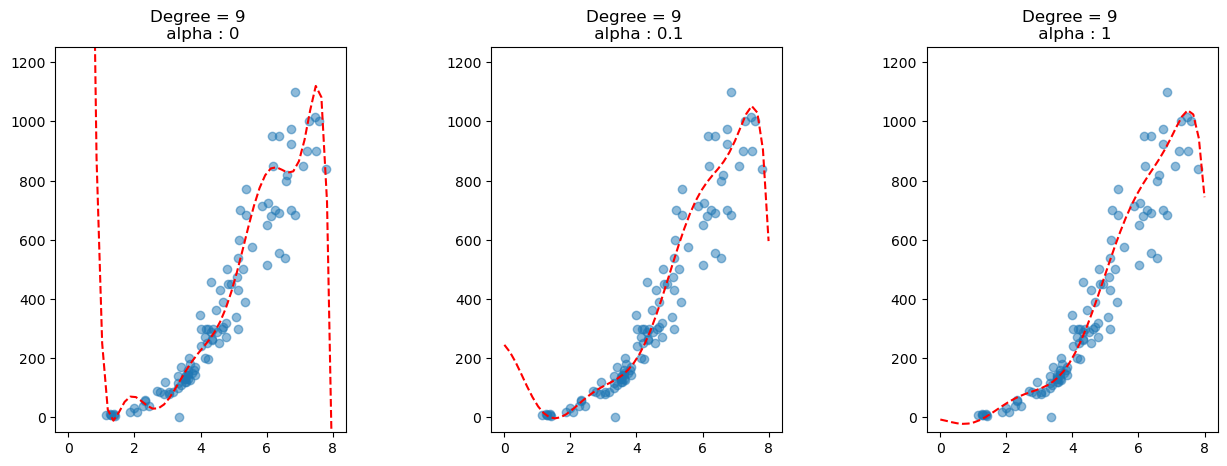

In [12]:
R2_score_list = []
RMSE_list = []

plt.figure(figsize = [15,5])
plt.subplots_adjust(wspace = 0.5)


j = 1

for alpha in [0,0.1,1]:
    
    model = Ridge(alpha = alpha)

    poly = PolynomialFeatures(degree= 9, include_bias = False)

    poly_x_train = poly.fit_transform(x_train)
    poly_y_train = poly.fit_transform(y_train)

    poly_model = model.fit(poly_x_train,x_test)

    predicted = poly_model.predict(poly_y_train)

    r2 = r2_score(y_test,predicted)
    rmse = np.sqrt(mean_squared_error(y_test,predicted))

    R2_score_list.append(r2)
    RMSE_list.append(rmse)


    poly_list = []
    

    for i,var in enumerate(poly_model.coef_):

        poly_list.append(np.power(X,i+1)*var)

    poly_list = sum(poly_list) + model.intercept_

    plt.subplot(1,3,j)
    plt.scatter(x_train,x_test, alpha = 0.5)
    plt.plot(X,poly_list, label = f'alpha = {alpha}', c = 'r', ls = '--')
    plt.ylim([-50,1250])
    plt.title(f'Degree = 9 \n alpha : {alpha}')
    j += 1


# 릿지 규제 정도에 따른 R2 score, RMSE의 변화 

In [13]:
result = pd.DataFrame({'Degree': ['0','0.1','1'],
              'R2 score': R2_score_list,
              'RMSE': RMSE_list})

result

,Degree,R2 score,RMSE
0,0,-0.581929,440.200546
1,0.1,0.798327,157.174104
2,1,0.881782,120.336963


(0.0, 1000.0)

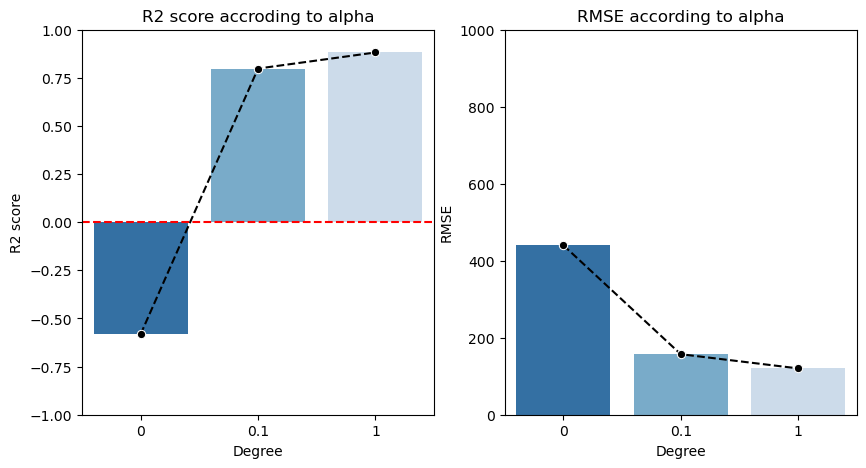

In [14]:
plt.figure(figsize = [10,5])

plt.subplot(1,2,1)

sns.lineplot(data = result,
            x = 'Degree',
            y = 'R2 score',
            marker = 'o',
            ls = '--',
            c = 'black')

sns.barplot(data = result,
            x = 'Degree',
            y = 'R2 score',
            palette = 'Blues_r')

plt.axhline(y = 0, ls = '--', c = 'r')

plt.ylim([-1,1])
plt.title('R2 score accroding to alpha')

plt.subplot(1,2,2)

sns.lineplot(data = result,
            x = 'Degree',
            y = 'RMSE',
            marker = 'o',
            ls = '--',
            c = 'black')

sns.barplot(data = result,
            x = 'Degree',
            y = 'RMSE',
            palette = 'Blues_r')
plt.title('RMSE according to alpha')
plt.ylim([0,1000])

# 릿지 규제가 강력해짐에 따라 R2 score 가 증가하고, RMSE 가 감소하는 모습을 볼 수 있습니다.

* 릿지 규제는 회귀분석 모델의 과적합을 줄이는 데 사용되는 방법 중 하나입니다. 릿지 규제는 회귀분석 계수(coefficient)의 크기를 제한함으로써 모델이 더 일반적인 패턴을 학습하도록 도와줍니다.

* 따라서 다항 선형 회귀분석과 릿지 규제를 함께 사용하면 비선형 관계를 모델링하면서도 모델의 과적합을 방지할 수 있습니다. 이는 다항 회귀 모델의 계수 크기를 제한하여 더 일반적인 패턴을 학습하도록 도와주는 릿지 규제와 함께 사용함으로써 더욱 효과적인 모델을 만들 수 있다는 것을 의미합니다.